## **Navie Bayes Classifier:**
> ### i)It is a classification technique based on Bayes' Theorem with an assumption of independence among predictors




> ### ii) supervised machine learning algorithm

*   training set: labeled input
*   test set: unlabeled data
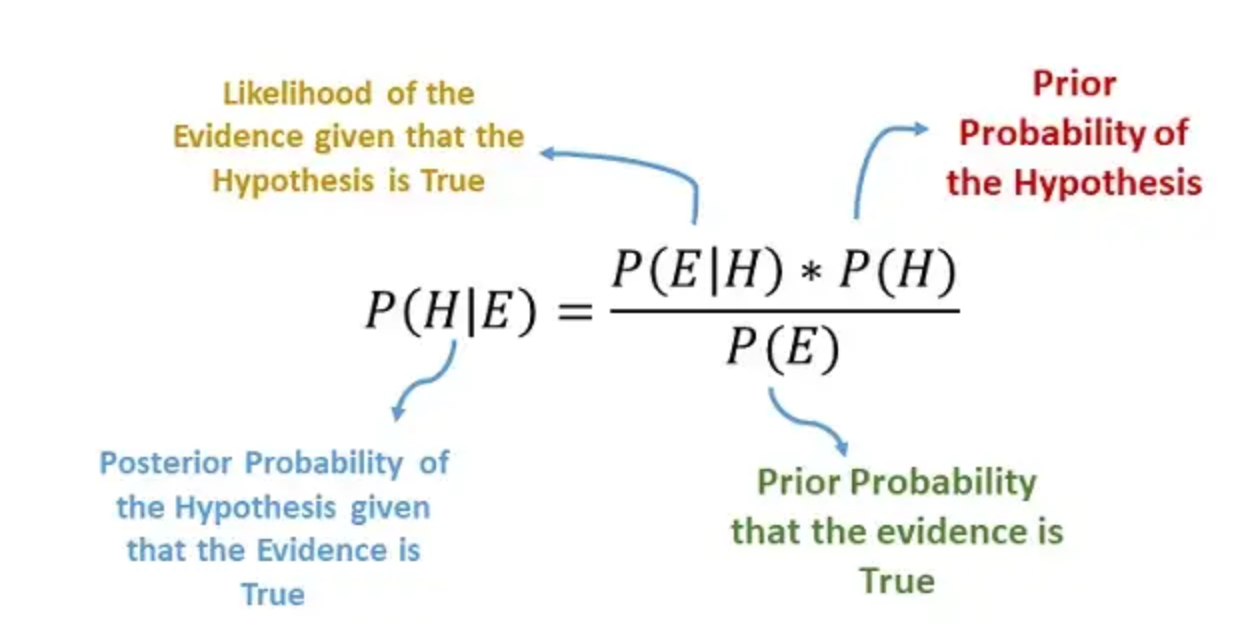

### **Import Libraries**:

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### **Loading Dataset**:

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd 
data=pd.read_csv('/content/gdrive/MyDrive/machine learning/survey lung cancer.csv')

### **DataSet Description:**
1.   Gender: M(male), F(female)
2.   Age: Age of the patient
3.   Smoking: YES=2 , NO=1.
4.   Yellow fingers: YES=2 , NO=1.
5.   Anxiety: YES=2 , NO=1.
6.   Peer_pressure: YES=2 , NO=1.
7.   Chronic Disease: YES=2 , NO=1.
8.   Fatigue: YES=2 , NO=1.
9.   Allergy: YES=2 , NO=1.
10.   Wheezing: YES=2 , NO=1.
11.   Alcohol: YES=2 , NO=1.
12.   Coughing: YES=2 , NO=1.
13.   Shortness of Breath: YES=2 , NO=1.
14.   Swallowing Difficulty: YES=2 , NO=1.
15.   Chest pain: YES=2 , NO=1.
16.   Lung Cancer: YES , NO.


In [ ]:
# print top 5 rows
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
#print last 5 rows
data.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


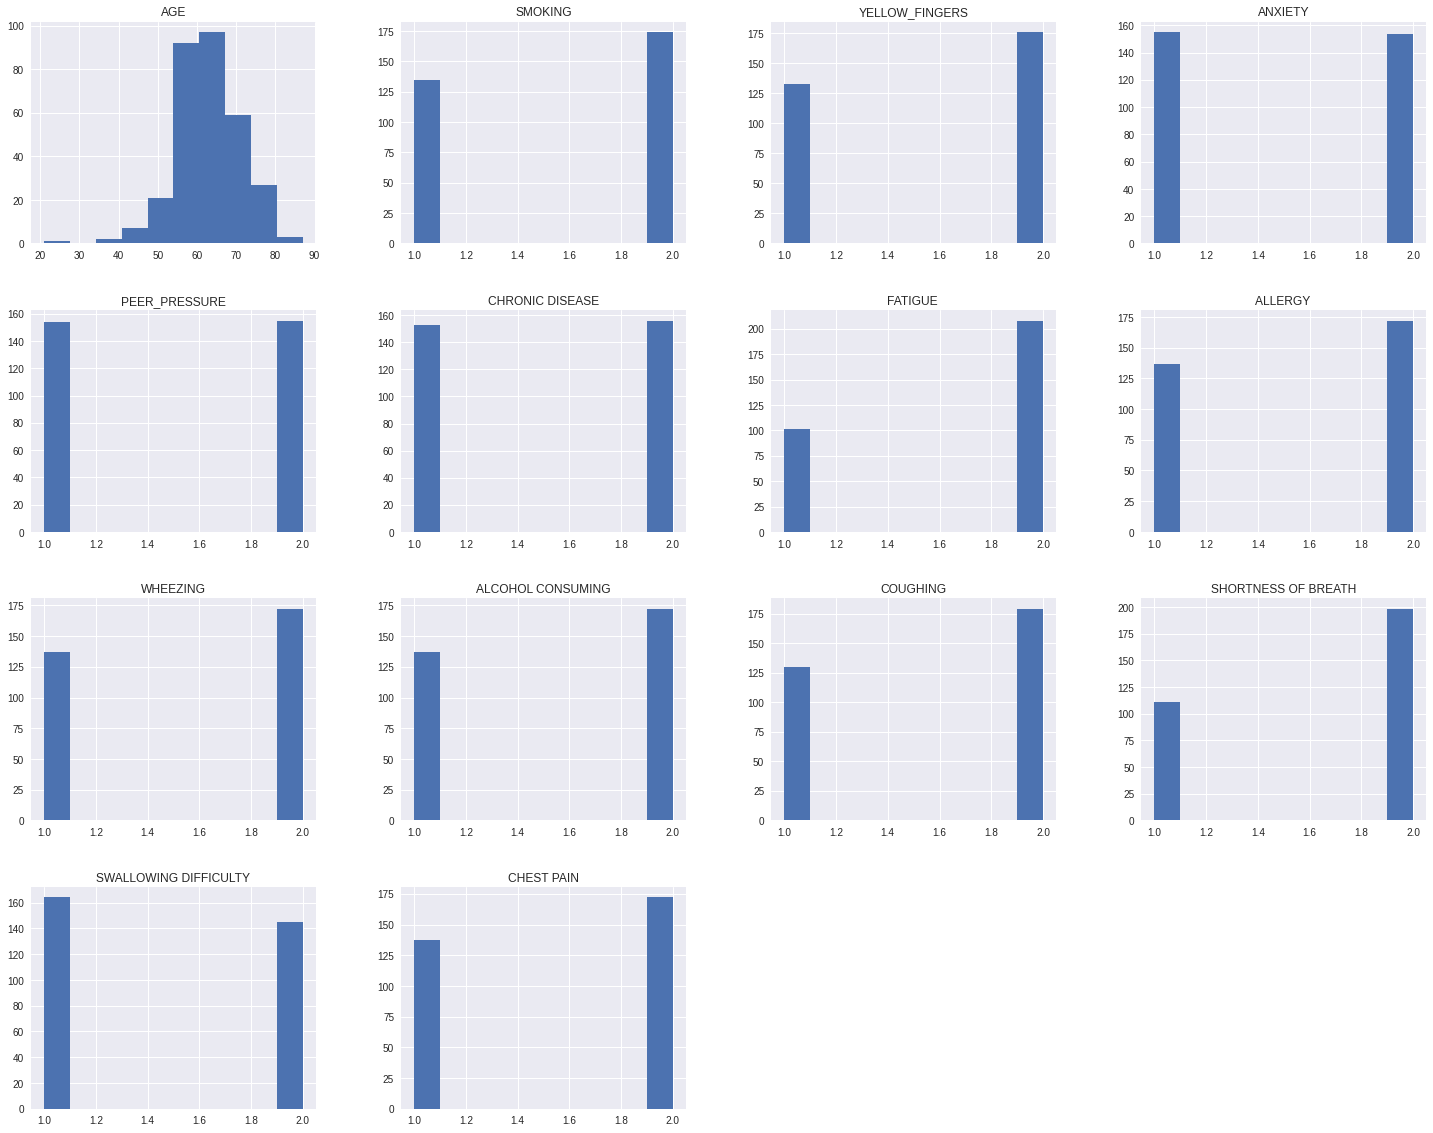

In [ ]:
#plot styl; memoried
plt.style.use("seaborn")
data.hist(figsize=(25,20),bins=10);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


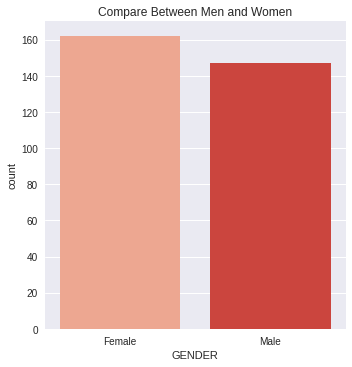

In [ ]:
import seaborn as sns
sns.catplot('GENDER',data=data,kind='count',palette='Reds').set(title='Compare Between Men and Women').set_xticklabels(['Female','Male'])
#sns.regplot(x='value', y='wage', data=df_melt, ax=axs[0])
#sns.regplot(x='value', y='wage', data=df_melt, ax=axs[1])
#sns.boxplot(x='education',y='wage', data=df_melt, ax=axs[2])

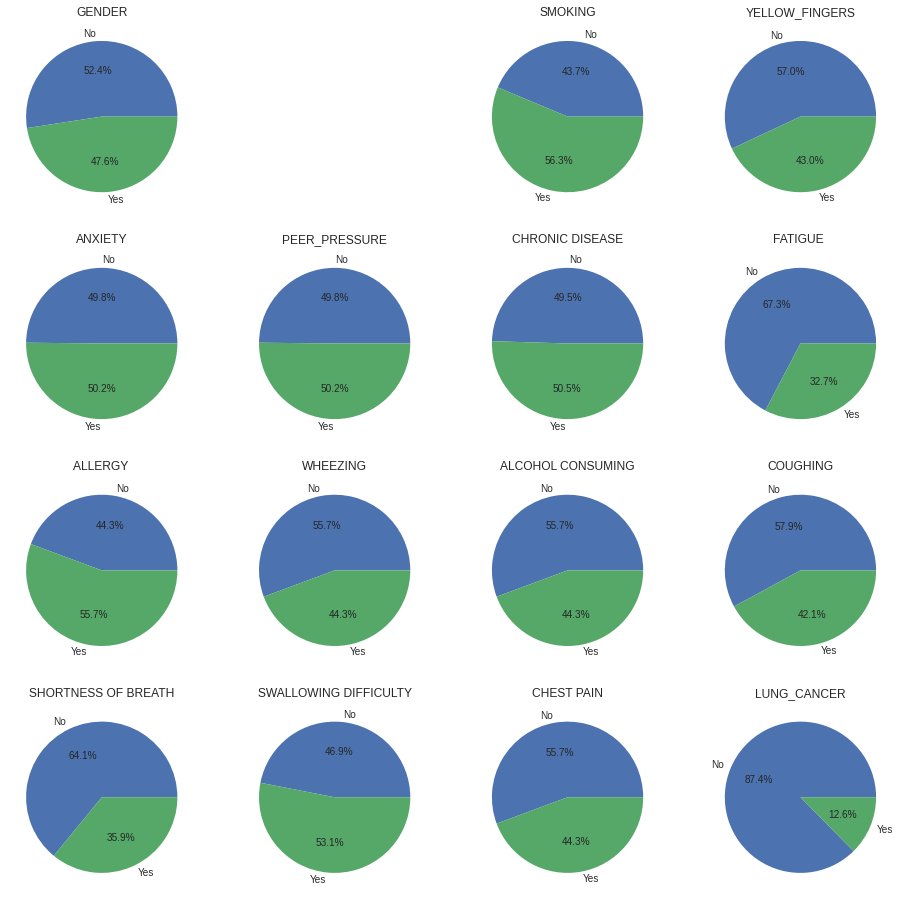

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
for i in range(0,len(data.columns)):
    if i == 1:
        continue
    else:
        plt.subplot(4,4,i+1)
        plt.title("{}".format(data.columns[i]))
        plt.pie(data.iloc[:,i].value_counts(sort=False),labels=['No','Yes'],autopct='%.1f%%')

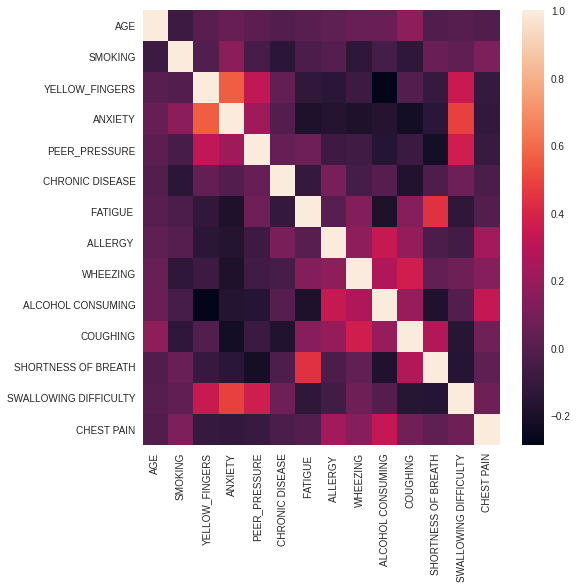

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr())

### **Split training and teseing set**:

In [ ]:
# Get all the data in the first eight columns
X = data.iloc[:,2:14]
#print(X)

In [ ]:
# label
y = data.iloc[:,15]
# print(y)

In [ ]:
#import train_test_split from sklearn
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=0)
#print(X_train)

In [ ]:
# Create Naive Bayes Classifier
classifier = GaussianNB()
# Train the model using the training sets
classifier.fit(X_train,y_train)
# Predict the response for test dataset
y_pred = classifier.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)

[[ 6  9]
 [ 4 74]]


In [ ]:
print(accuracy_score(y_test,y_pred))

0.8602150537634409


In [ ]:
# Get all the data in the first eight columns
x = data.iloc[:,6:9]
print(x)

     CHRONIC DISEASE  FATIGUE   ALLERGY 
0                  1         2         1
1                  2         2         2
2                  1         2         1
3                  1         1         1
4                  1         1         1
..               ...       ...       ...
304                2         2         1
305                1         2         2
306                1         1         2
307                1         2         2
308                1         2         2

[309 rows x 3 columns]


In [ ]:
#import train_test_split from sklearn
x_train,x_test,Y_train,Y_test= train_test_split(x,y,test_size=0.3,random_state=0)
#print(X_train)

In [ ]:
# Create Naive Bayes Classifier
classifier = GaussianNB()
# Train the model using the training sets
classifier.fit(x_train,Y_train)
# Predict the response for test dataset
Y_pred = classifier.predict(x_test)

In [ ]:
print(accuracy_score(Y_test,Y_pred))

0.8279569892473119


In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter,defaultdict
import scipy  # probability distributions
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # creating & visualising confusion matrices
from sklearn.model_selection import train_test_split # splitting data in train/test set

###**MAP(maximum a posteriori)-estimate:**  

In [2]:
label = ['A','B']
prob = [0.3,0.7]
print(label[1])
# np.argmax: Returns the indices of the maximum values along an axis.
c = label[np.argmax(prob)]
print(c)
print('MAP estimate of example result is: %s' %c)

B
B
MAP estimate of example result is: B


### **Bayes theorem:**

In [9]:
# p(B)
prior_prob = 0.001  # p(B)
# p(A|B)
likelihood = 0.99 # p(A|B)
# p(A|B) * p(B) + p(A|~B) * p(~B) = p(A)
evidence = prior_prob * likelihood + (1-prior_prob) * (1-likelihood)
print(evidence)
# p(B|A)=P(A|B)*P(B)/P(A)
prior = (likelihood * prior_prob) / evidence
print(prior)
print('The probability of having the illness given the positive test result is:%s' %prior)

0.010980000000000009
0.09016393442622944
The probability of having the illness given the positive test result is:0.09016393442622944
